Using the conditions of optimality, find the extreme points of the following functions and determine whether they are maxima or minima. PSD

Mounted at /content/drive
Part B


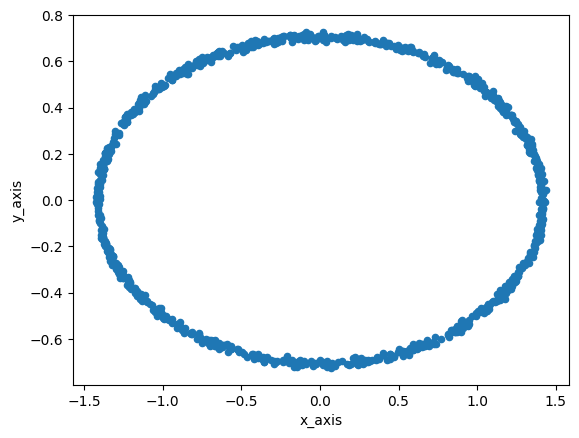

999
Part C : Gradient Descent algorithm and Part D


NameError: name 'f_history' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

#load csv file using google collab
drive.mount('/content/drive')
path = '/content/drive/My Drive/HW2_ellipse.csv'
df = pd.read_csv(path)


#part b
print("Part B")

#print scatter plot
df.columns = ['x_axis', 'y_axis']
df.plot.scatter(x='x_axis', y='y_axis')
plt.show()
print(len(df))


#part C
print("Part C : Gradient Descent algorithm and Part D")

#initialize matrices/vals
def create_Matrix():
    x = df['x_axis'].values
    y = df['y_axis'].values
    A = np.column_stack((x**2, y**2))
    b = np.ones(len(df))
    return A, b

#helper funct
def compute_gradient(A, a, b):
    return 2 * A.T @ (A @ a - b)

#helper funct
def compute_objective(A, a, b):
    return np.sum((A @ a - b) ** 2)

#grad descent alg
def gradient_descent_alg(A, b):
    tol = 1e-6
    a = np.ones(2)
    ATA = A.T @ A
    step_size = 1 / (2 * np.linalg.norm(ATA, 2))
    func_history = []

    for i in range(1000):

        grad = compute_gradient(A, a, b)
        a_new = a - step_size * grad
        func_val = compute_objective(A, a_new, b)
        f_history.append(func_val)

        # Check convergence
        if np.linalg.norm(a_new - a) < tol:
            print(f"Converged at {i + 1} iterations")
            break

        a = a_new


    return a, f_history

#run create matrices A and b
A, b = create_Matrix()  # Added this line to create A and b

#run gradient descent
a_optimal, f_history = gradient_descent_alg(A, b)

print(f"estimated a: a1 = {a_optimal[0]}, a2 = {a_optimal[1]}")
print(f"(Min f(a)) Final value of f(a) = {f_history[-1]}")


def plot_ellipse(a1, a2):
        # Generate points for the ellipse
        theta = np.linspace(0, 2 * np.pi, 100)
        x = np.sqrt(1 / a1) * np.cos(theta)
        y = np.sqrt(1 / a2) * np.sin(theta)

        # Plot the ellipse
        plt.plot(x, y, color='red', label=f'Ellipse (a1={a1:.4f}, a2={a2:.4f})')
        plt.legend()
        plt.show()

#plot ellipse
plot_ellipse(a_optimal[0], a_optimal[1])




Part D cont:

An estimation for a1 would be 0.5 and 2.0 for a2. The estimated value for f(a) would be 0.464.
I beleive with size of the samples N (999 data points) and final value of f(a), the values I got from the code is a good fit. The number of iterations untill convergence was reletivley small compared to the total data and the f(a) is a small. I do believe that this the optimal a1 and a2.